<a href="https://colab.research.google.com/github/Mini-project4ppl/Mini_Project/blob/master/AHE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from google.colab import drive
drive.mount("/content/drive/", force_remount=True)

Mounted at /content/drive/


In [ ]:
import cv2
import os

# Set the path to the directory containing the images
image_directory = '/content/drive/MyDrive/DR_IMAGES'

# Set the path to the directory where you want to save the enhanced images
output_directory = '/content/drive/MyDrive/DR_AHE'

# Iterate through each file in the directory
for filename in os.listdir(image_directory):
    # Read the image
   image_path = os.path.join(image_directory, filename)
   image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

   # Apply Adaptive Histogram Equalization
   image_ahe = cv2.equalizeHist(image)

   # Write the enhanced image to the output directory
   output_path = os.path.join(output_directory, filename)
   cv2.imwrite(output_path, image_ahe)

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
img=cv2.imread('/content/drive/MyDrive/ahe test pics/4.jpg')
#print(type(img))
output_dir = '/content/drive/MyDrive/ahe test pics'

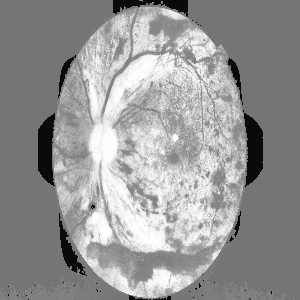

In [ ]:
#to print an input image

image = cv2.resize(img, (300, 300))

# The initial processing of the image
# image = cv2.medianBlur(image, 3)
image_bw = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#cv2.normalize(image_bw, image_bw, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

# The declaration of CLAHE
# clipLimit -> Threshold for contrast limiting
final_img = cv2.equalizeHist(image_bw)

# Ordinary thresholding the same image
_, ordinary_img = cv2.threshold(image_bw, 0, 150, cv2.THRESH_BINARY)

# Save final image to output directory
output_path = os.path.join(output_dir, 'test_img_op.jpg')
cv2.imwrite(output_path, final_img)

# Showing all the three images
#cv2_imshow(image)
#cv2_imshow(image_bw)
cv2_imshow(final_img)


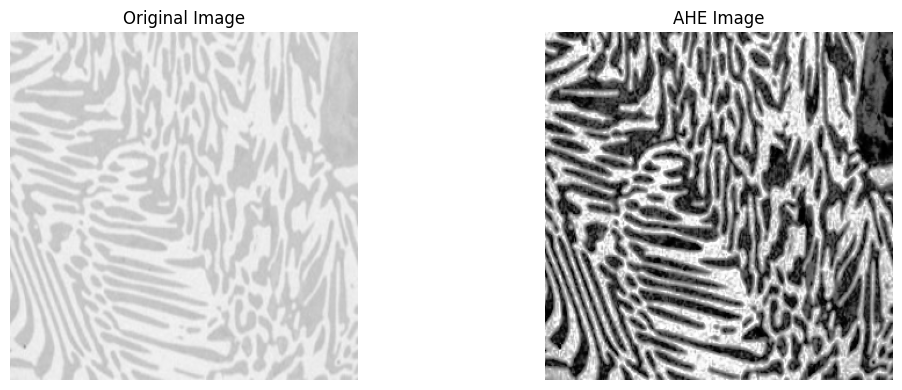

In [ ]:
#original vs AHE
# Resize the image
image = cv2.resize(img, (300, 300))

# Convert to grayscale
image_bw = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply AHE
final_img = cv2.equalizeHist(image_bw)

# Apply ordinary thresholding
_, ordinary_img = cv2.threshold(image_bw, 0, 150, cv2.THRESH_BINARY)

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Display the original image
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')

# Display the grayscale image
#axes[1].imshow(image_bw, cmap='gray')
#axes[1].set_title('Grayscale Image')

# Display the AHE image
axes[1].imshow(final_img, cmap='gray')
axes[1].set_title('AHE Image')

# Remove the axis ticks and labels
for ax in axes:
    ax.axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


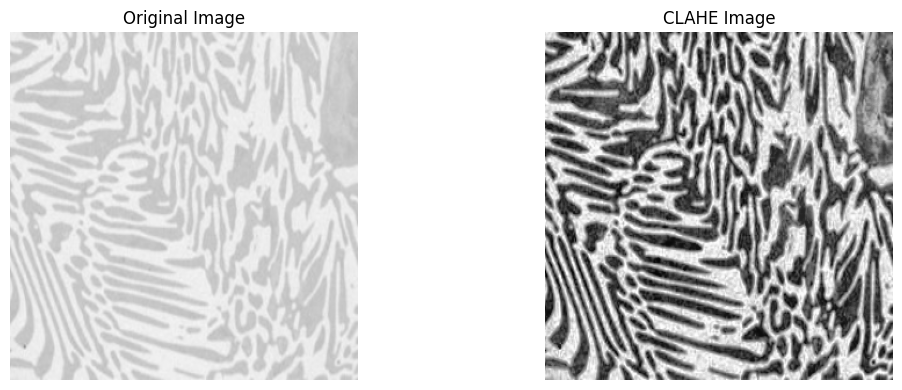

In [ ]:
#Original VS CLAHE
# Resize the image
image = cv2.resize(img, (300, 300))

# Convert to grayscale
image_bw = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply CLAHE
clahe = cv2.createCLAHE(clipLimit=7)
final_img = clahe.apply(image_bw)

# Apply ordinary thresholding
_, ordinary_img = cv2.threshold(image_bw, 0, 150, cv2.THRESH_BINARY)

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Display the original image
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')

# Display the grayscale image
#axes[1].imshow(image_bw, cmap='gray')
#axes[1].set_title('Grayscale Image')

# Display the CLAHE image
axes[1].imshow(final_img, cmap='gray')
axes[1].set_title('CLAHE Image')

# Remove the axis ticks and labels
for ax in axes:
    ax.axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


Metric Value using Correlation Hist Comp Method 0.9897445724082794
Metric Value using Chi Square Hist Comp Method 18.575293547401124
Metric Value using Intersection Hist Comp Method 1.4737231226063159
Metric Value using Bhattacharyya Hist Comp Method 0.5482239011931977




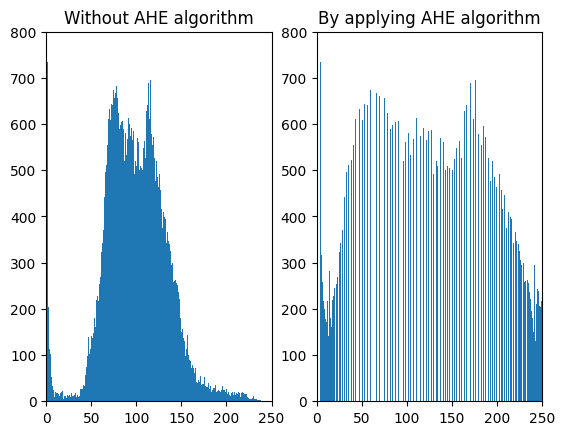

In [ ]:
#Histogram Representation
img1=image_bw
img2=final_img

# Calculate the histograms, and normalize them
#hist_img1 = cv2.calcHist([img1], [0, 1, 2], None, [256, 256, 256], [0, 256, 0, 256, 0, 256])
#hist_img2 = cv2.calcHist([img2], [0, 1, 2], None, [256, 256, 256], [0, 256, 0, 256, 0, 256])

hist_img1=cv2.calcHist([img1],[0],None,[256],[0,256])
hist_img2=cv2.calcHist([img2],[0],None,[256],[0,256])

cv2.normalize(hist_img1, hist_img1, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
cv2.normalize(hist_img2, hist_img2, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

# Find the metric value
metric_val1 = cv2.compareHist(hist_img1, hist_img2, cv2.HISTCMP_CORREL)
metric_val2 = cv2.compareHist(hist_img1, hist_img2, cv2.HISTCMP_CHISQR)
metric_val3 = cv2.compareHist(hist_img1, hist_img2, cv2.HISTCMP_INTERSECT)
metric_val4 = cv2.compareHist(hist_img1, hist_img2, cv2.HISTCMP_BHATTACHARYYA)
print("Metric Value using Correlation Hist Comp Method", metric_val1)
print("Metric Value using Chi Square Hist Comp Method", metric_val2)
print("Metric Value using Intersection Hist Comp Method", metric_val3)
print("Metric Value using Bhattacharyya Hist Comp Method", metric_val4)

print("\n")

# plot the histograms of two images
plt.subplot(121), plt.hist(img1.ravel(),256,[0,256]),
plt.title('Without AHE algorithm')
plt.xlim(0,250)
plt.ylim(0,800)

plt.subplot(122), plt.hist(img2.ravel(),256,[0,256]),
plt.title('By applying AHE algorithm')
plt.xlim(0,250)
plt.ylim(0,800)
plt.show()